<a href="https://colab.research.google.com/github/RJamesMaier/machine-learning/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

Eine Anwendung von Natural Language Processing besteht darin, die semantische Information eines Satzes zu bestimmen. So können Firmen sehen, ob ihre Marke eher mit positiven, negativen oder neutralen Worten in Zusammenhang gebracht wird.

Es gibt hierfür zwei Ansätze:
* lexicon-basiert: Hier werden einfach die Anzahl der positiven und negativen Wörter gezählt.
* Machine Learning-basiert: Hier wird ein Algorithmus trainiert, der die Beiträge kategorisiert.

Wir werden den Machine-Learning-baisierten Ansatz wählen.

Hierfür müssen wir zuerst den Datensatz verfügbar machen. Den Datensatz kann man von GitHub herunterladen.

In [0]:
!git clone https://github.com/RJamesMaier/movie_dataset.git

Cloning into 'movie_dataset'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [0]:
!ls

movie_dataset  sample_data


In [0]:
import pandas as pd

train_data = pd.read_csv('movie_dataset/train.tsv', sep = '\t')

test_data = pd.read_csv('movie_dataset/test.tsv', sep = '\t')

train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
train_data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

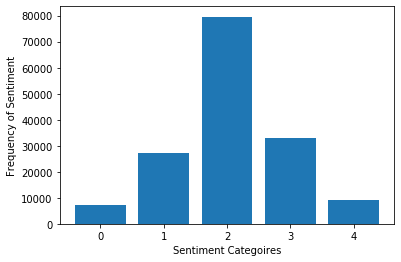

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Sentiment_count = train_data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Sentiment Categoires')
plt.ylabel('Frequency of Sentiment')
plt.show()

# Feature Extraction

Nachdem wir uns einen Überblick über unsere Daten gegeben haben, müssen wir die Textdaten in Zahlen umwandeln.

Eine Möglichkeit ist das sogenannte Bag-of-Words (BoW). Hierbei werden die Textdaten in eine Matrix umgewandelt. Diese Matrix gibt die Häufigkeit der Wörter in der Textdatei wieder. Diese Matrix wird als [Document-Term-Matrix](https://en.wikipedia.org/wiki/Document-term_matrix) (dtm) bezeichnet. 

Der BoW-Ansatz ist ein Term-Frequency(TF)-Ansatz. Hier werden lediglich die Anzahl der Wörter gezählt. Das bedeutet, dass länger Texte mehr Gewicht bekommen, da es hier nur um die Häufigkeit geht.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer('\w+')
cv = CountVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1,1),tokenizer = token.tokenize) 
text_counts = cv.fit_transform(train_data['Phrase'])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, train_data['Sentiment'], test_size = 0.3, random_state = 1)

# Modell bauen

Für diese Aufgabe werden wir einen multinomiales Naive Bayes Algorithmus verwenden. Wir der Name schon sagt, kann dieser mit mehr als 2 Kategorien umgehen.

In [0]:
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

nb_clf = MultinomialNB().fit(X_train, y_train)
predicted = nb_clf.predict(X_test)

print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


Der Term Frequency-Inverse Document Frequency (TF-IDF) gleicht die Nachteile des TFs wieder aus. TF-IDF entsteht durch die Multiplikation von TF und IDF. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

tf_idf = TfidfVectorizer()

text_tf_idf = tf_idf.fit_transform(train_data['Phrase'])

X_train, X_test, y_train, y_test = train_test_split(
    text_tf_idf, train_data['Sentiment'], test_size = 0.3, random_state = 123)

nb_clf = MultinomialNB().fit(X_train, y_train)
predicted = nb_clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


# Tensorflow

Versuchen wir mal eine Klassifizierung mit der beliebten Tensorflow-Bibliothek durchzuführen.

